Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from PIL import Image
import torch
import torchvision.transforms.functional as TF
import numpy as np
import sys
sys.path.append("../")
import utils

%matplotlib inline

Explore train csv

In [2]:
train = pd.read_csv("../dataset/train.csv")

In [3]:
num_pos = len(train.loc[train["label"] == 1])
num_neg = len(train.loc[train["label"] == 0])

print(f"Number of positive samples : {num_pos}\nNumber of negative samples : {num_neg}")

Number of positive samples : 10330
Number of negative samples : 8288


Data isnt too imbalanced. Data pre-processing shouldnt be necessary for a baseline

In [74]:
img = Image.open("../dataset/train/8.jpg")
img_tensor = utils.pil_to_tensor(img)
img_gray = utils.pil_to_gray(img)

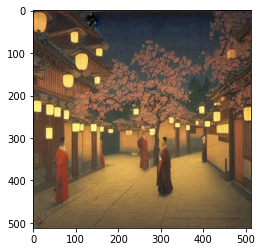

In [75]:
utils.plot_tensor(img_tensor)

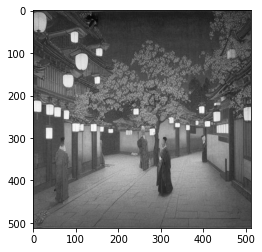

In [76]:
utils.plot_tensor(img_gray, cmap="gray")

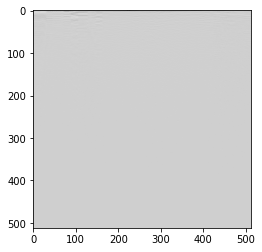

In [77]:
dct = utils.dct2d(img_gray)
plt.imshow(utils.viz_dct(dct, 512), cmap="gray")

In [78]:
viz_dct = utils.viz_dct(dct)

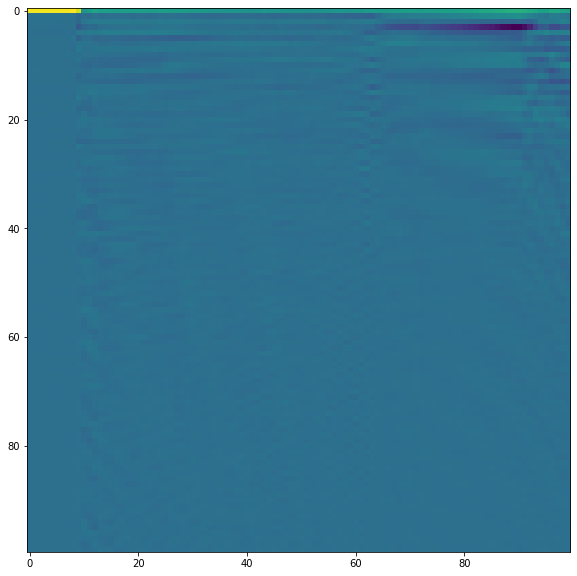

In [26]:
plt.figure(figsize=(10,10))
plt.imshow((viz_dct/viz_dct.max())[:, :])

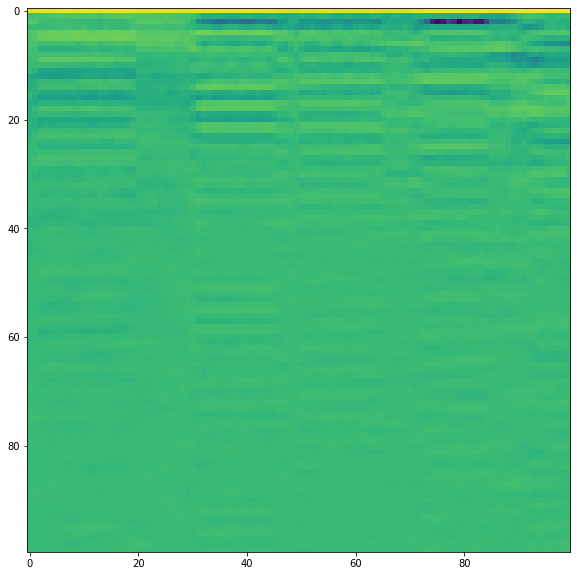

In [79]:
plt.figure(figsize=(10,10))
plt.imshow((viz_dct/viz_dct.max())[:, :])

In [90]:
type(list(train["label"])[0])

int

In [102]:
import torchvision
import torch.nn as nn

In [109]:
model = torchvision.models.convnext_tiny(weights="DEFAULT", progress=True)

In [110]:
model

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU(approximate=none)
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96

In [111]:
model.classifier[2] = nn.Linear(768, 2)

In [113]:
model(torch.randn(1, 3, 512, 512))

tensor([[0.2133, 0.3897]], grad_fn=<AddmmBackward0>)